In [1]:
%run Reactive_Air_shock_2T_last.py

# Results

Here we presents the results ...

## 11 specie problem

In [2]:
_11specie = problem()

# Add species 
_11specie.add_specie_ic(O2, 0.21)
_11specie.add_specie_ic(N2, 0.79)
_11specie.add_specie_ic(NO,  0.0)
_11specie.add_specie_ic(N,  0)
_11specie.add_specie_ic(O,  0)
_11specie.add_specie_ic(O2p,  0.0)
_11specie.add_specie_ic(NOp,  0.0)
_11specie.add_specie_ic(N2p,  0.0)
_11specie.add_specie_ic(Np,  0.0)
_11specie.add_specie_ic(Op,  0.0)
_11specie.add_specie_ic(em,  0.0)

# Add reactions
_11specie.reaction.append(O2diss)
_11specie.reaction.append(N2diss)
_11specie.reaction.append(NOdiss)
_11specie.reaction.append(NO_O)
_11specie.reaction.append(O_N2)
_11specie.reaction.append(O_O2p)
_11specie.reaction.append(N2_Np)
_11specie.reaction.append(O_NOp )
_11specie.reaction.append(N2_Op)
_11specie.reaction.append(N_NOp)
_11specie.reaction.append(O2_NOp)
_11specie.reaction.append(NOp_N)
_11specie.reaction.append(O___N)
_11specie.reaction.append(O___O)
_11specie.reaction.append(N___N)
_11specie.reaction.append(O_ion)
_11specie.reaction.append(N_ion)

# Set ic
# _11specie.T0     = 300
# _11specie.rho0   = 10 / (287.05 * 300)
# _11specie.u0     = 10000
_11specie.T0     = 247.02 
_11specie.rho0   = 3.097e-4
_11specie.u0     = 5062 

### 1 Temperature model

In [3]:
# Solve
_11specie.solve()
_11specie.postprocess()

Pre shock Mach : 16.010791175644
******************************
Post-shock guess values:
rho    : 0.001822649350213218
T      : 12545.86127110793
Speed  : 860.1223267748162
Mach   : 0.38173914079572485
******************************
Post-shock values:
rho    : 0.002401132237101427
T      : 9991.384913071724
Tv     : 247.02
Speed  : 652.9009005736732
Mach   : 0.3427029524583364
******************************
Reference mean free path : 2.171245829203977e-05



### 2 Temperature model

In [4]:
_11specie_2T = cp.deepcopy(_11specie)
_11specie_2T.solve_2T()
_11specie_2T.postprocess()

Pre shock Mach : 16.010791175644
******************************
Post-shock guess values:
rho    : 0.001822649350213218
T      : 12545.86127110793
Speed  : 860.1223267748162
Mach   : 0.38173914079572485
******************************
Post-shock values:
rho    : 0.001822649350213217
T      : 12545.861271107933
Tv     : 247.02
Speed  : 860.1223267748168
Mach   : 0.40953601412437957
******************************
Reference mean free path : 2.171245829203977e-05



### Plot

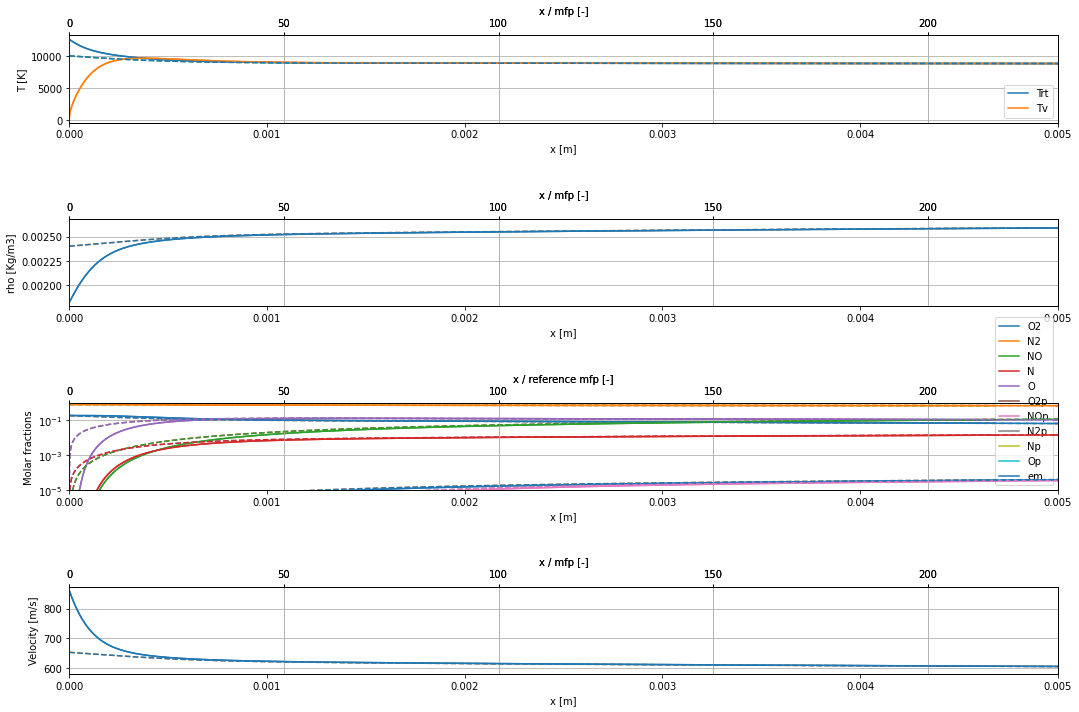

In [5]:
xmax = 5e-3
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

_11specie_2T.plot_2T(ax[0], xmax = xmax)
_11specie_2T.plot_rho(ax[1], xmax = xmax)
_11specie_2T.logplot_X(ax[2], xmax = xmax)
_11specie_2T.plot_u(ax[3], xmax = xmax)

_11specie.plot_T(ax[0], xmax = xmax,ls = '--')
_11specie.plot_rho(ax[1], xmax = xmax,ls = '--')
_11specie.logplot_X(ax[2], xmax = xmax,ls = '--')
_11specie.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()

Maximum mass flux error       : 9.758509618046399e-12
Maximum momentum flux error   : 1.9810023520497075e-11
Maximum enthalpy flux error   : 3.913432903139794e-06
Maximum mass frac error       : 2.7400304247748863e-13
Last value of mass flux       : 1.5677014000152636
Ymin                          : 0.0


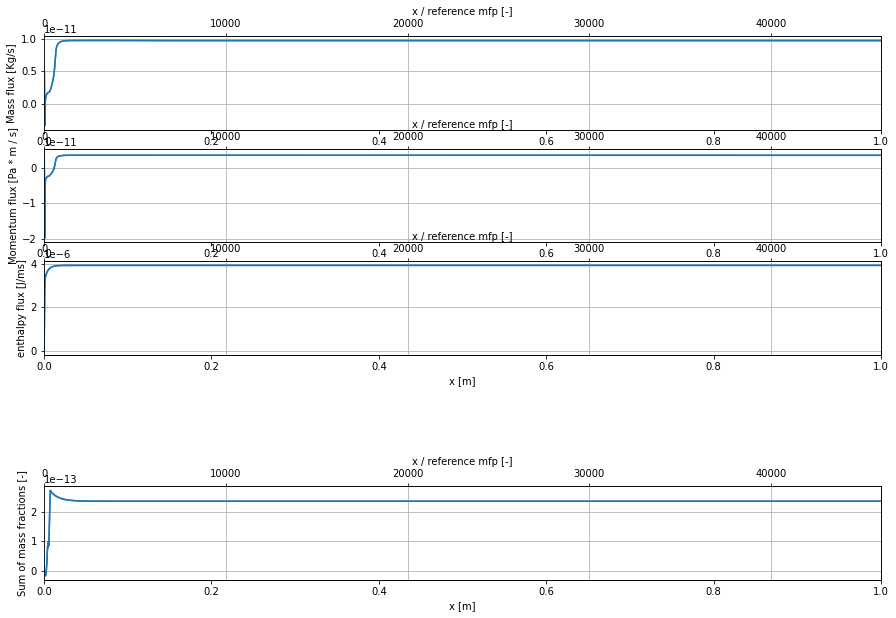

In [6]:
_11specie.validate()

Maximum mass flux error       : 4.743283238972915e-11
Maximum momentum flux error   : 4.33458839710948e-11
Maximum energy flux error     : 2.99966519343234e-06
Maximum mass frac error       : 7.560618797697316e-14
Last value of mass flux       : 1.5677014000743597
Ymin                          : -2.75963269369378e-72


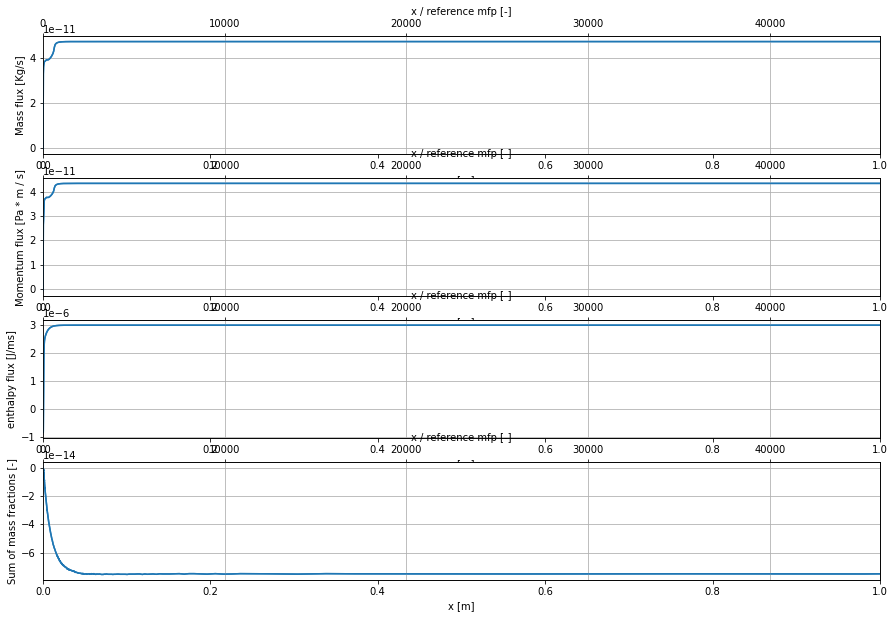

In [7]:
_11specie_2T.validate_2T()

## 7 specie problem

In [8]:
_7specie = problem()

# Add species 
_7specie.add_specie_ic(O2, 0.21)
_7specie.add_specie_ic(N2, 0.79)
_7specie.add_specie_ic(NO,  0.0)
_7specie.add_specie_ic(N,  0)
_7specie.add_specie_ic(O,  0)
_7specie.add_specie_ic(NOp,  0.0)
_7specie.add_specie_ic(em,  0.0)

# Add reactions
_7specie.reaction.append(O2diss_7s)
_7specie.reaction.append(N2diss_7s)
_7specie.reaction.append(NOdiss_7s)
_7specie.reaction.append(NO_O)
_7specie.reaction.append(O_N2)
_7specie.reaction.append(O___N)

# Set ic
_7specie.T0     = _11specie.T0     
_7specie.rho0   = _11specie.rho0 
_7specie.u0     = _11specie.u0

### 1 Temperature model

In [9]:
# Solve
_7specie.solve()
_7specie.postprocess()

Pre shock Mach : 9.488813418990912
******************************
Post-shock guess values:
rho    : 0.0017604386724263956
T      : 4557.570656927443
Speed  : 527.7661838224844
Mach   : 0.3886257432083695
******************************
Post-shock values:
rho    : 0.002155405752703583
T      : 3866.6467190357316
Tv     : 247.02
Speed  : 431.0557299174899
Mach   : 0.35969468082376066
******************************
Reference mean free path : 2.24797367936556e-05



### 2 Temperature model

In [10]:
_7specie_2T = cp.deepcopy(_7specie)
_7specie_2T.solve_2T()
_7specie_2T.postprocess()

Pre shock Mach : 9.488813418990912
******************************
Post-shock guess values:
rho    : 0.0017604386724263956
T      : 4557.570656927443
Speed  : 527.7661838224844
Mach   : 0.3886257432083695
******************************
Post-shock values:
rho    : 0.0017604386724263954
T      : 4557.570656927445
Tv     : 247.02
Speed  : 527.7661838224847
Mach   : 0.4059616831345451
******************************
Reference mean free path : 2.24797367936556e-05



### Plot

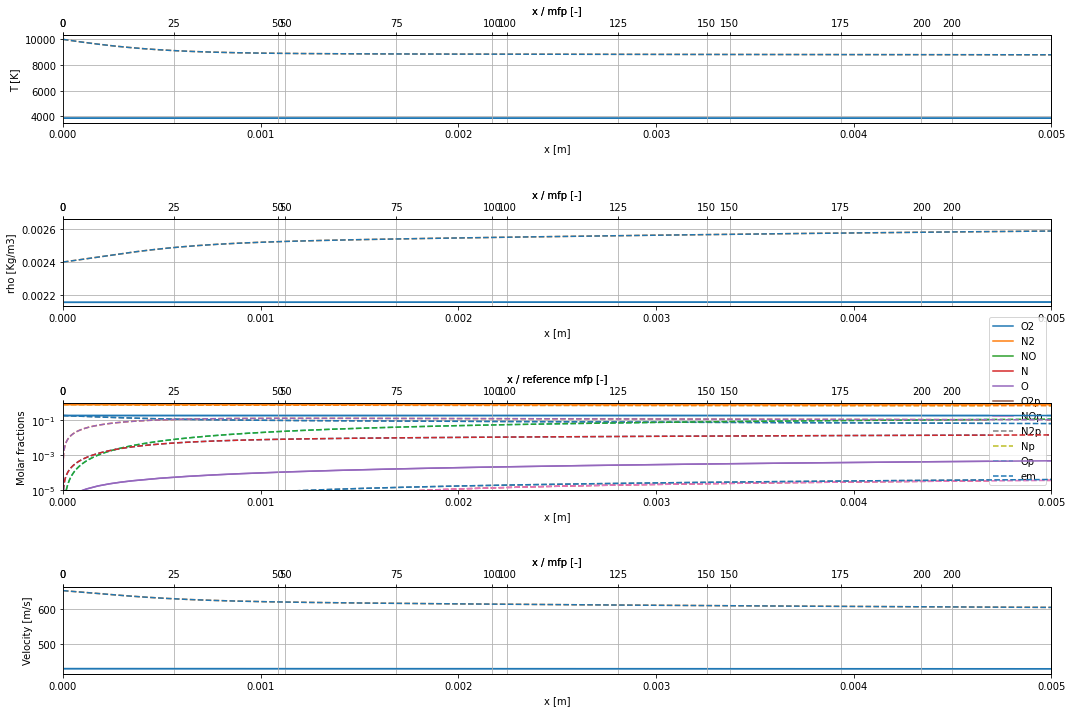

In [11]:
xmax = 5e-3
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

_7specie.plot_T(ax[0], xmax = xmax)
_7specie.plot_rho(ax[1], xmax = xmax)
_7specie.logplot_X(ax[2], xmax = xmax)
_7specie.plot_u(ax[3], xmax = xmax)

_11specie.plot_T(ax[0], xmax = xmax,ls = '--')
_11specie.plot_rho(ax[1], xmax = xmax,ls = '--')
_11specie.logplot_X(ax[2], xmax = xmax,ls = '--')
_11specie.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()

## Effect of altitude (density)

In [12]:
low_altitude = cp.deepcopy(_11specie)
low_altitude.rho0 = 100 * _11specie.rho0
low_altitude.solve()
low_altitude.postprocess()

Pre shock Mach : 16.010791175644
******************************
Post-shock guess values:
rho    : 0.1822649350213218
T      : 12545.86127110793
Speed  : 860.1223267748162
Mach   : 0.38173914079572485
******************************
Post-shock values:
rho    : 0.24011322371014276
T      : 9991.384913071723
Tv     : 247.02
Speed  : 652.9009005736727
Mach   : 0.34270295245833615
******************************
Reference mean free path : 2.171245829203977e-07



While the effect of a different mixture model can be compared in the same spatial coordinates, increasing at different altitudes (densities) the post-shock conditions are different and in particular the mean free path, thus the relaxation length, is significantly reduced. However, the number of mean free path that lead to relaxation is expected to be the same, hence a more appropriate spatial coordinate to compare the results in the distance measured as number of reference mean free path.

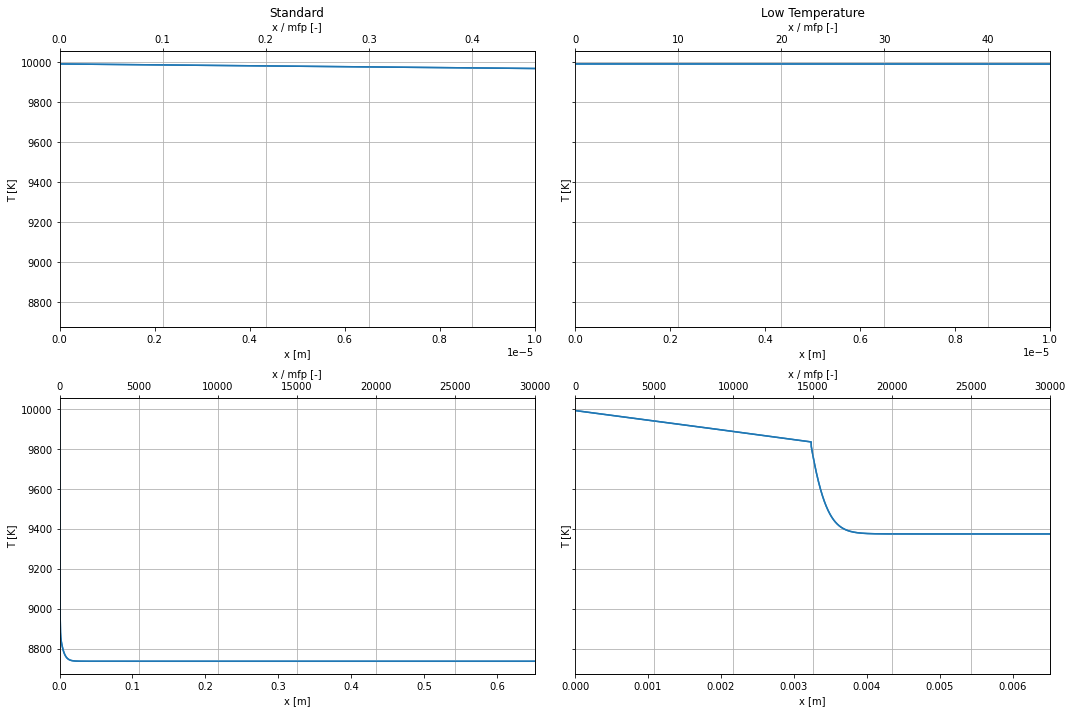

In [18]:
xmax = 1e-5
xmax_l = 30000

fig, ax = plt.subplots(2,2, sharey = True)

_11specie.plot_T(ax[0,0], xmax = xmax)
ax[0,0].set_title('Standard')

low_altitude.plot_T(ax[0,1], xmax = xmax)
ax[0, 1].set_title('Low Temperature')

_11specie.plot_T(ax[1,0], xmax_l = xmax_l)

low_altitude.plot_T(ax[1,1], xmax_l = xmax_l)

fig.tight_layout()

## Effect of temperature

The post-shock temperature depends mainly on the pre-shock Mach number since the pre-shock thermal energy is much smaller than the kinetic energy of the flow in hypersonic flows, thus the effect of temperature is insignificant but for the relaxation length of the vibrational temperature in the 2 temperature model and the reactions that depend strongly on that temperature such as electron impacts.

In [14]:
low_T = cp.deepcopy(_11specie_2T)
low_T.T0 = _11specie.T0 / 10
low_T.solve_2T()
low_T.postprocess()

Pre shock Mach : 50.63056725636004
******************************
Post-shock guess values:
rho    : 0.001854582649341758
T      : 12336.026769079364
Speed  : 845.3122326774815
Mach   : 0.3783434443696611
******************************
Post-shock values:
rho    : 0.001854582649341758
T      : 12336.026769079364
Tv     : 24.702
Speed  : 845.3122326774815
Mach   : 0.4052800418106494
******************************
Reference mean free path : 2.133860036465016e-05



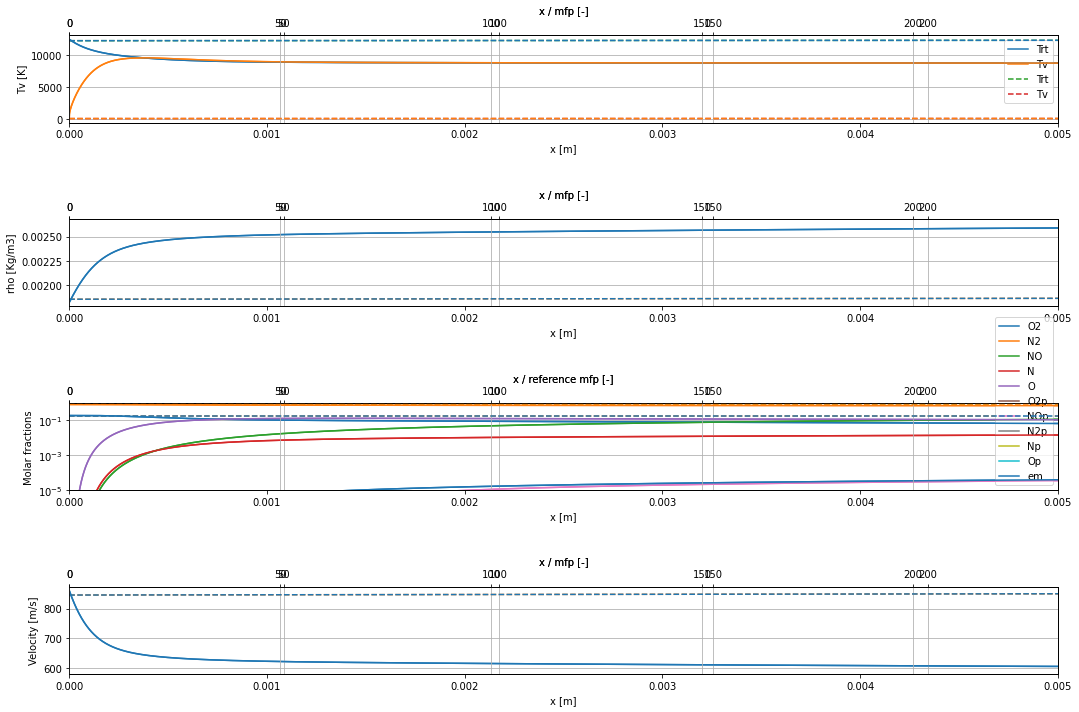

In [15]:
xmax = 5e-3
xmax_l = 3e7

fig, ax = plt.subplots(4, 1,)

_11specie_2T.plot_2T(ax[0], xmax = xmax)
_11specie_2T.plot_rho(ax[1], xmax = xmax)
_11specie_2T.logplot_X(ax[2], xmax = xmax)
_11specie_2T.plot_u(ax[3], xmax = xmax)

low_T.plot_2T(ax[0], xmax = xmax,ls = '--')
low_T.plot_rho(ax[1], xmax = xmax,ls = '--')
low_T.logplot_X(ax[2], xmax = xmax,ls = '--')
low_T.plot_u(ax[3], xmax = xmax, ls = '--')

fig.tight_layout()